In [5]:
% load_ext autoreload
% autoreload 2

import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.datasets.multivariate_anomaly_function import MultivariateAnomalyFunction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Test pipeline implementation

In [25]:
dataset = MultivariateAnomalyFunction.get_multivariate_dataset(length=1000, method='doubled')
X_train, y_train, X_test, y_test = dataset.data()

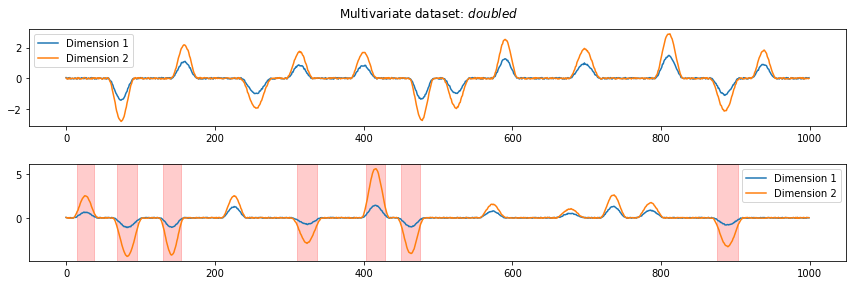

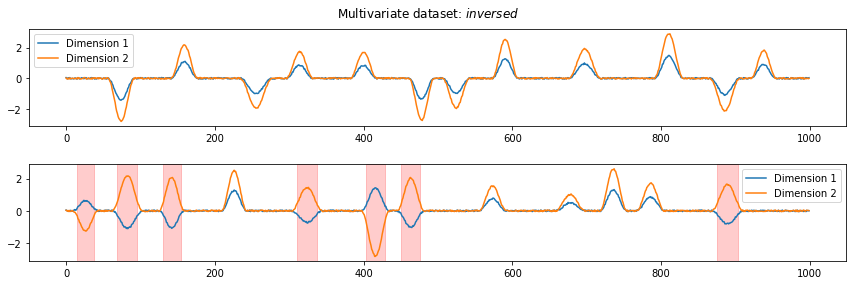

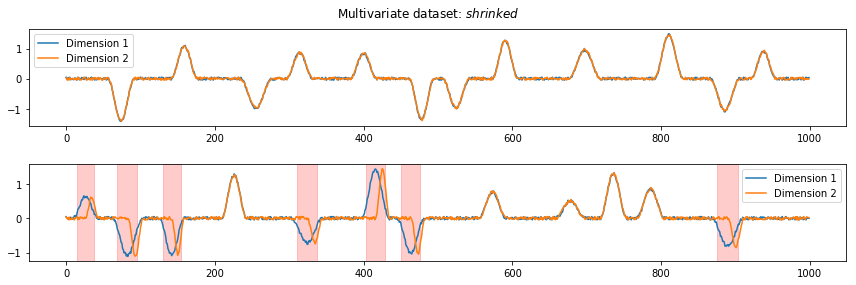

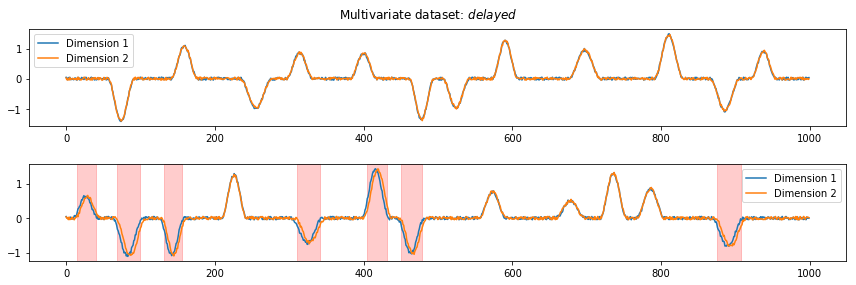

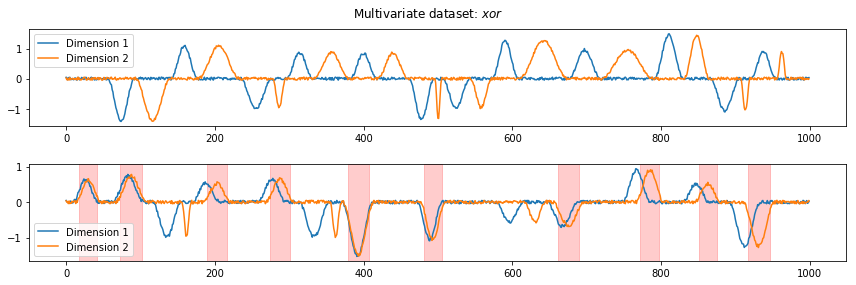

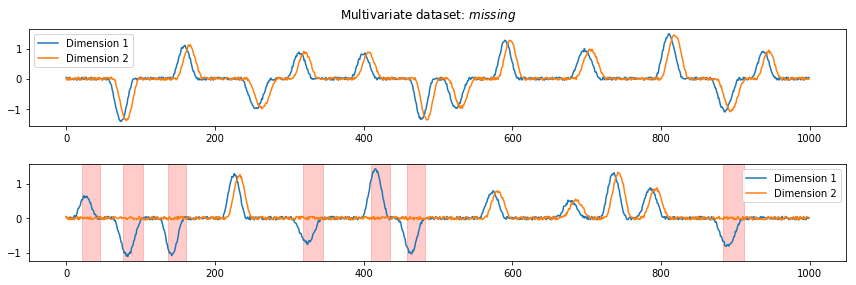

In [37]:
def plot_dataset(X_train, X_test, y_test, title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 4))
    X_train.rename(columns={0: 'Dimension 1', 1: 'Dimension 2'}).plot(ax=axes[0])
    X_test.rename(columns={0: 'Dimension 1', 1: 'Dimension 2'}).plot(ax=axes[1])

    starts = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(1) == 0)]
    ends = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(-1) == 0)]
    for start_idx, end_idx in zip(starts, ends):
        axes[1].axvspan(start_idx, end_idx, alpha=0.2, color='red')
    
    fig.tight_layout()
    
    # Avoid overlapping title and axis labels
    fig.subplots_adjust(top=0.9, hspace=0.4)
    fig.savefig(f'Multivariate-Dataset-{title}.pdf')
    fig.suptitle(title)

def generate_and_plot_dataset(dim2_name):
    dataset = MultivariateAnomalyFunction.get_multivariate_dataset(length=1000, method=dim2_name)
    X_train, y_train, X_test, y_test = dataset.data()
    plot_dataset(X_train, X_test, y_test, rf'Multivariate dataset: ${dim2_name}$')

generate_and_plot_dataset('doubled')
generate_and_plot_dataset('inversed')
generate_and_plot_dataset('shrinked')
generate_and_plot_dataset('delayed')
generate_and_plot_dataset('xor')
generate_and_plot_dataset('missing')